#Feature Scaling
In this notebook we implement two methods of feature scaling to bring all the paramters on same scale.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext_fs.csv')
sales = books[['Year_Month','Sum of Sales']]
books = books.dropna(axis = 1)
exog = books.iloc[:,2:]
sales

,Year_Month,Sum of Sales
0,2008-01,282604.11
1,2008-02,262474.40
2,2008-03,326059.68
3,2008-04,215387.49
4,2008-05,499559.90
...,...,...
150,2020-07,150348.10
151,2020-08,156066.95
152,2020-09,468710.96
153,2020-10,1118446.80


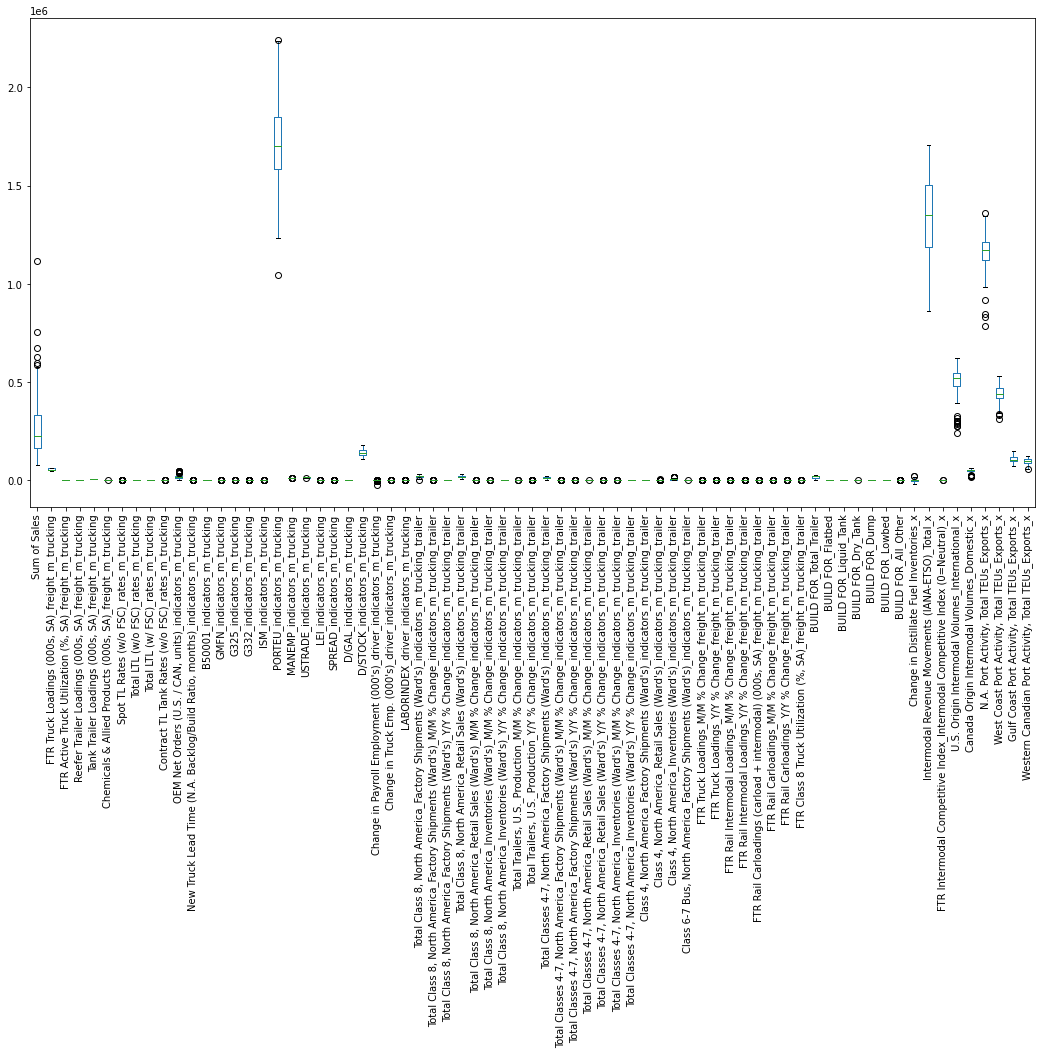

In [4]:
books.plot.box(figsize=(18, 9),rot=90)

#Scaling
### Normalization

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

After this, all the features will have a minimum value of 0 and a maximum value of 1.

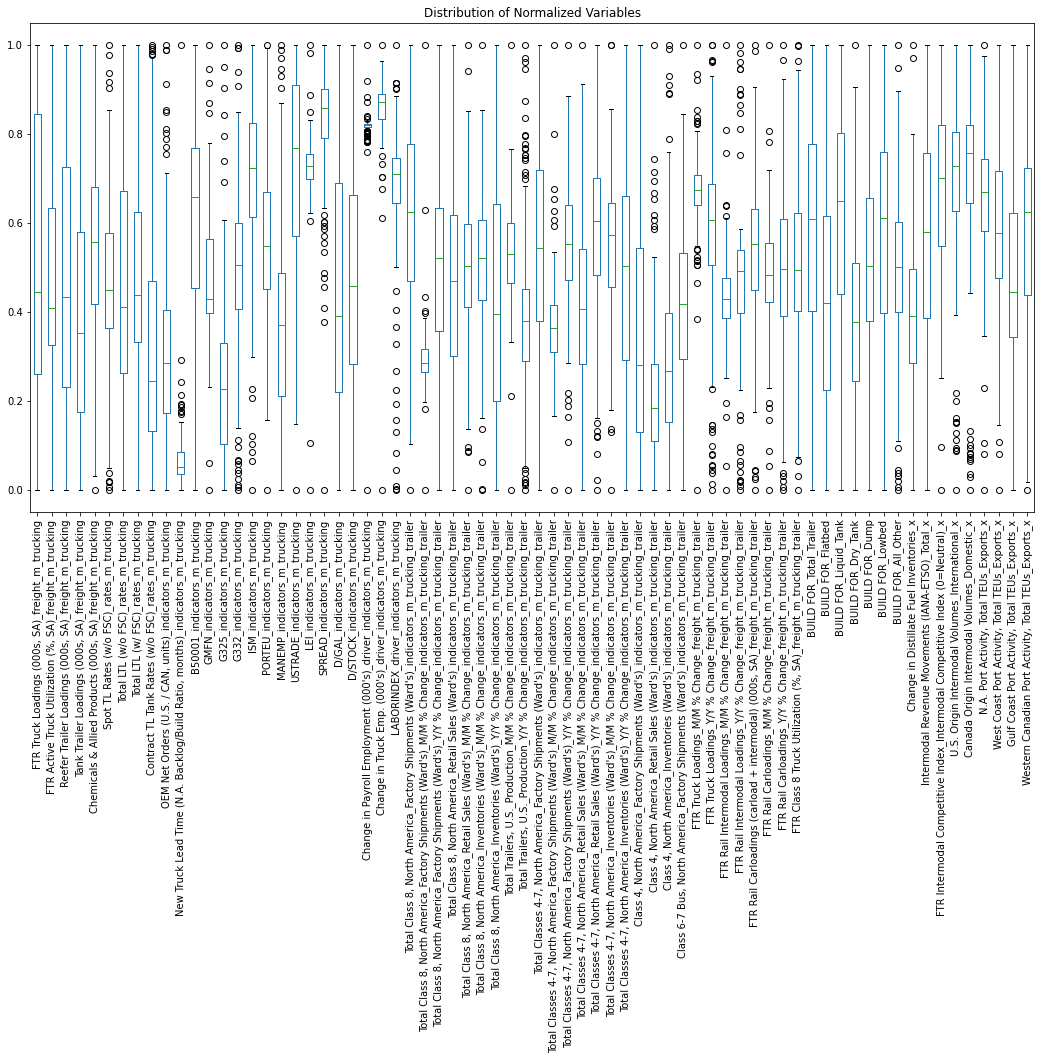

In [13]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(exog)
exog_norm = pd.DataFrame(norm.transform(exog),columns=exog.columns)
exog_norm.plot.box(figsize=(18, 9),rot=90,title = "Distribution of Normalized Variables")

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
exog_stand = exog.copy()
num_cols = exog.columns
for i in num_cols:
    
    # fit on data column
    scale = StandardScaler().fit(exog[[i]])
    
    # transform the data column
    exog_stand[i] = scale.transform(exog[[i]])

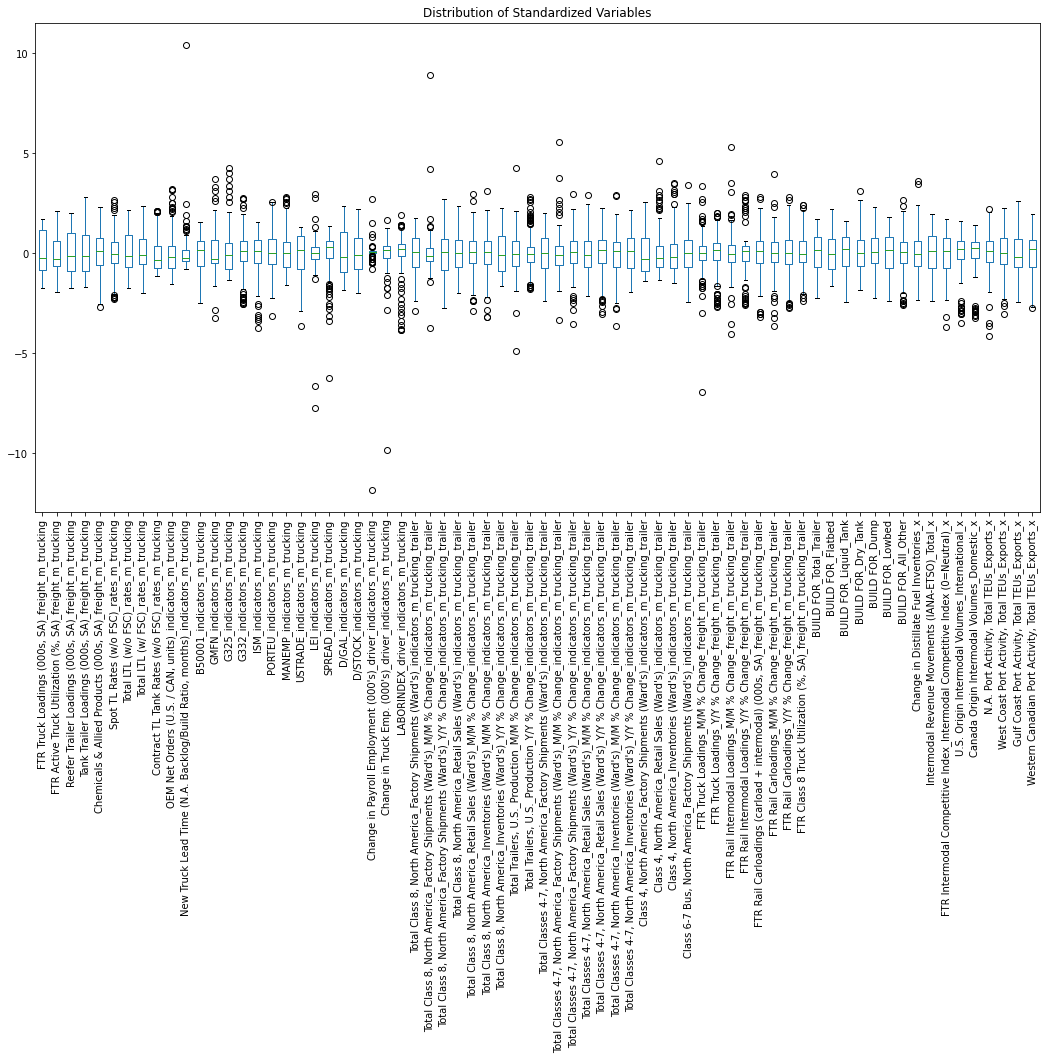

In [14]:
exog_stand.plot.box(figsize=(18, 9),rot=90,title = "Distribution of Standardized Variables")

Save both the transformed features for further use

In [16]:
# Append Date and Sum of sales to the transformed datasets
exog_norm[['Year_Month','Sum of Sales']] = books[['Year_Month','Sum of Sales']]
exog_stand[['Year_Month','Sum of Sales']] = books[['Year_Month','Sum of Sales']]

# Save to csv
exog_norm.to_csv("/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/normalized_features.csv")
exog_stand.to_csv("/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/standardized_features.csv")